In [1]:
using RHEOS
using Distributions
using PyPlot 

In [2]:
data = importcsv("../data/data.csv", ω_col = 1, Gp_col = 2, Gpp_col = 3);
rheofreqdatatype(data)

┌ Warning: use values(kwargs) and keys(kwargs) instead of kwargs.data and kwargs.itr
│   caller = importcsv(filepath::String; delimiter::Char, header::Bool, comment::String, savelog::Bool, kwargs::Base.Pairs{Symbol, Int64, Tuple{Symbol, Symbol, Symbol}, NamedTuple{(:ω_col, :Gp_col, :Gpp_col), Tuple{Int64, Int64, Int64}}}) at IO.jl:69
└ @ RHEOS C:\Users\avill\.julia\packages\RHEOS\4cxTK\src\IO.jl:69


with_modulus::FreqDataType = 1

## Fractional Kelvin-Voigt

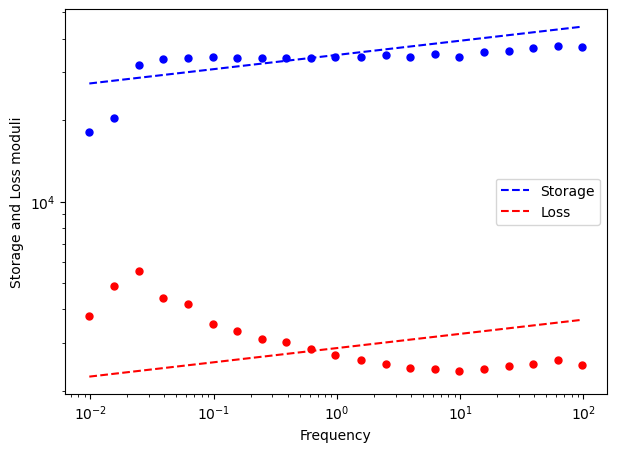

Time: 1.9251009 s, Why: XTOL_REACHED, Parameters: [34949.042114757365, 0.05251281693715745, 0.0, 0.10042846172089011], Error: 3.690967003041479

┌ Warning: Note that a logarithmic rescaling will fail if Gp or Gpp data contain 0.0 values as it will result in -Inf cost. Trying a different rescaling scheme, or not fitting around ω≈0.0 may alleviate the issue.
└ @ RHEOS C:\Users\avill\.julia\packages\RHEOS\4cxTK\src\processing.jl:836


PyObject <matplotlib.legend.Legend object at 0x00000000692EECD0>

In [3]:
# Lower bounds
Lo = (cₐ = 0.0, a = 0.01, cᵦ = 0.0, β = 0.01)
# Upper bounds
Hi = (cₐ = 1e16, a = 0.99, cᵦ = 1e16, β = 0.99)
# Initial parameters
P0 = (cₐ = 1.0, a = 0.36, cᵦ = 1.0, β = 0.03)

FractKV_model = dynamicmodelfit(data, Fract_KelvinVoigt, weights = "log", lo = Lo, hi = Hi, p0 = P0)

data_ext = extract(data, freq_only)
rheofreqdatatype(data_ext)

fractKV_predict = dynamicmodelpredict(data_ext, FractKV_model)

fig, ax = subplots(1, 1, figsize = (7, 5))
ax.loglog(data.ω, data.Gp, "o", markersize = 5, color = "blue")
ax.loglog(data.ω, data.Gpp, "o", markersize = 5, color = "red")
ax.loglog(fractKV_predict.ω, fractKV_predict.Gp, "--", color = "blue", label="Storage")
ax.loglog(fractKV_predict.ω, fractKV_predict.Gpp, "--", color = "red", label="Loss")
ax.set_xlabel("Frequency")
ax.set_ylabel("Storage and Loss moduli")
ax.legend()

## Fractional Maxwell

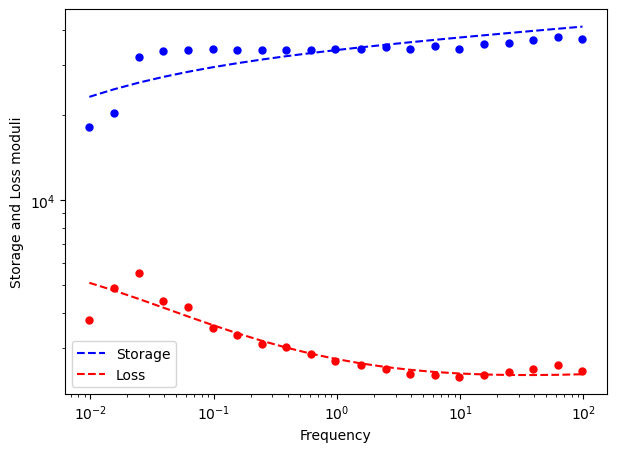

Time: 1.0499853 s, Why: XTOL_REACHED, Parameters: [879848.2075992767, 0.4805554859567359, 35142.149290296744, 0.0354135390193484], Error: 0.46326929969098013

┌ Warning: Note that a logarithmic rescaling will fail if Gp or Gpp data contain 0.0 values as it will result in -Inf cost. Trying a different rescaling scheme, or not fitting around ω≈0.0 may alleviate the issue.
└ @ RHEOS C:\Users\avill\.julia\packages\RHEOS\4cxTK\src\processing.jl:836


PyObject <matplotlib.legend.Legend object at 0x0000000069C02970>

In [4]:
#Lower bounds
Lo = (cₐ = 0.0, a = 0.01, cᵦ = 0.0, β = 0.01)
# Upper bounds
Hi = (cₐ = 1e16, a = 0.99, cᵦ = 1e16, β = 0.99)
# Initial parameters
P0 = (cₐ = 1.0, a = 0.36, cᵦ = 1.0, β = 0.03)

FractM_model = dynamicmodelfit(data, Fract_Maxwell, weights = "log", lo = Lo, hi = Hi, p0 = P0)

data_ext = extract(data, freq_only)

rheofreqdatatype(data_ext)

fractM_predict = dynamicmodelpredict(data_ext, FractM_model)

fig, ax = subplots(1, 1, figsize = (7, 5))
ax.loglog(data.ω, data.Gp, "o", markersize = 5, color = "blue")
ax.loglog(data.ω, data.Gpp, "o", markersize = 5, color = "red")
ax.loglog(fractM_predict.ω, fractM_predict.Gp, "--", color = "blue", label="Storage")
ax.loglog(fractM_predict.ω, fractM_predict.Gpp, "--", color = "red", label="Loss")
ax.set_xlabel("Frequency")
ax.set_ylabel("Storage and Loss moduli")
## Fractional Maxwell

## Fractional Maxwell with spring

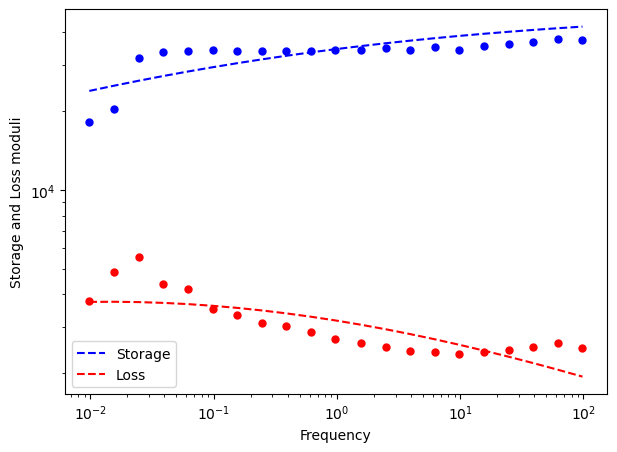

Time: 0.19635 s, Why: XTOL_REACHED, Parameters: [112183.9532972848, 0.1915085043507721, 49509.11640751833], Error: 0.94634918317999

┌ Warning: Note that a logarithmic rescaling will fail if Gp or Gpp data contain 0.0 values as it will result in -Inf cost. Trying a different rescaling scheme, or not fitting around ω≈0.0 may alleviate the issue.
└ @ RHEOS C:\Users\avill\.julia\packages\RHEOS\4cxTK\src\processing.jl:836


PyObject <matplotlib.legend.Legend object at 0x000000007112F5E0>

In [5]:
# Lower bounds
Lo = (cₐ = 0.0, a = 0.01, k = 0.0)
# Upper bounds
Hi = (cₐ = 1e16, a = 0.99, k = 1e16)
# Initial parameters
P0 = (cₐ = 879848.2075992767, a = 0.4805554859567359, k = 35142.149290296744)

FractM_model = dynamicmodelfit(data, FractS_Maxwell, weights = "log", lo = Lo, hi = Hi, p0 = P0)

data_ext = extract(data, freq_only)

rheofreqdatatype(data_ext)

fractM_predict = dynamicmodelpredict(data_ext, FractM_model)

fig, ax = subplots(1, 1, figsize = (7, 5))
ax.loglog(data.ω, data.Gp, "o", markersize = 5, color = "blue")
ax.loglog(data.ω, data.Gpp, "o", markersize = 5, color = "red")
ax.loglog(fractM_predict.ω, fractM_predict.Gp, "--", color = "blue", label="Storage")
ax.loglog(fractM_predict.ω, fractM_predict.Gpp, "--", color = "red", label="Loss")
ax.set_xlabel("Frequency")
ax.set_ylabel("Storage and Loss moduli")
ax.legend()

## Fractional Zener

In [ ]:
# Lower bounds
Lo = (cₐ = 0.0, a = 0.01, cᵦ = 0.0, β = 0.01, cᵧ = 0.0, γ = 0.01)
# Upper bounds
Hi = (cₐ = 1e8, a = 0.99, cᵦ = 1e8, β = 0.99, cᵧ=1e8, γ= 0.99)
# Initial parameters
P0 = (cₐ = 1.0, a = 0.5, cᵦ = 1.0, β = 0.3, cᵧ=1.0, γ=0.93)

FractZ_model = dynamicmodelfit(data, Fract_Zener, weights = "log", lo = Lo, hi = Hi, p0 = P0)

data_ext = extract(data, freq_only)

rheofreqdatatype(data_ext)

fractZ_predict = dynamicmodelpredict(data_ext, FractZ_model)

fig, ax = subplots(1, 1, figsize = (7, 5))
ax.loglog(data.ω, data.Gp, "o", markersize = 5, color = "blue")
ax.loglog(data.ω, data.Gpp, "o", markersize = 5, color = "red")
ax.loglog(fractZ_predict.ω, fractZ_predict.Gp, "--", color = "blue", label="Storage")
ax.loglog(fractZ_predict.ω, fractZ_predict.Gpp, "--", color = "red", label="Loss")
ax.set_xlabel("Frequency")
ax.set_ylabel("Storage and Loss moduli")
ax.legend()

## Full Zener

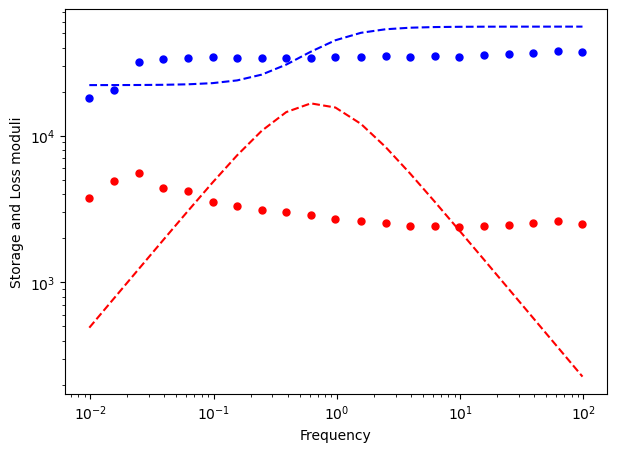

Time: 0.2590212 s, Why: XTOL_REACHED, Parameters: [49941.18362955717, 33387.325582942794, 22155.697971949674], Error: 42.05399015333032

┌ Warning: Note that a logarithmic rescaling will fail if Gp or Gpp data contain 0.0 values as it will result in -Inf cost. Trying a different rescaling scheme, or not fitting around ω≈0.0 may alleviate the issue.
└ @ RHEOS C:\Users\avill\.julia\packages\RHEOS\4cxTK\src\processing.jl:836


PyObject Text(24.000000000000007, 0.5, 'Storage and Loss moduli')

In [6]:
# Lower bounds
Lo = (η  = 0.0, kᵦ = 0.0, kᵧ = 0.0)
# Upper bounds
Hi = (η  = 1e6, kᵦ = 1e6, kᵧ = 1e6)
# Initial parameters
P0 = (η  = 1e2, kᵦ = 1e2, kᵧ = 1e2)


FractZ_model = dynamicmodelfit(data, SLS_Zener, weights = "log", lo = Lo, hi = Hi, p0 = P0)

data_ext = extract(data, freq_only)

rheofreqdatatype(data_ext)

fractZ_predict = dynamicmodelpredict(data_ext, FractZ_model)

fig, ax = subplots(1, 1, figsize = (7, 5))
ax.loglog(data.ω, data.Gp, "o", markersize = 5, color = "blue")
ax.loglog(data.ω, data.Gpp, "o", markersize = 5, color = "red")
ax.loglog(fractZ_predict.ω, fractZ_predict.Gp, "--", color = "blue", label="Storage")
ax.loglog(fractZ_predict.ω, fractZ_predict.Gpp, "--", color = "red", label="Loss")
ax.set_xlabel("Frequency")
ax.set_ylabel("Storage and Loss moduli")
ax.legend()